# Capstone Webscrapping using BeautifulSoup

Exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 5/31/2020 and 11/26/2020



In [53]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so we can see what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [54]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellis'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [55]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 500 character. 

In [56]:
print(soup.prettify()[:1000])

<!DOCTYPE html>
<!--[if lt IE 9]>
    <html class="no-js ie8 oldie" lang='en' xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="C#" name="CODE_LANGUAGE">
   <meta content="JavaScript" name="vs_defaultClientScript"/>
   <meta content="http://schemas.microsoft.com/intellisense/ie5" name="vs_targetSchema"/>
   <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
   <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
    <meta content="AP" name="mapping"/>
    <base href="https://www.exchange-rates.org/"/>
    <link href="https://ajax.googleapis.com/" rel="dns-prefetch"/>
    <link href="https://www.google-analytics.com/" rel="dns-prefetch"/>
    <link as="image" href="https://dol8qrceshfrq.cloudfront


Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [57]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     12/1/2020
    </td>
    <td>
     Tuesday
    </td>
    <td>
     <a href="/Rate/USD/IDR/12-1-2020">
      14,118.51435
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/12-1-2020">
      USD IDR rate for 12/1/2020
     </a>
    </td>
   </tr>
   <tr>
    <td>
     11/30/2020
    </td>
   


Do the scrapping process here (please change this markdown with your explanation)

In [58]:
tr = table.find_all('tr')
tr[:1] 

[<tr><td>12/1/2020</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/12-1-2020">14,118.51435</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/12-1-2020">USD IDR rate for 12/1/2020</a></td></tr>]

In [59]:
temp = [] #initiating a tuple

for i in range(0, len(tr)):
    tr = table.find_all('tr')[i]
    
    #get tanggal
    Date = tr.find_all('td')[0].text
    Date = Date.strip() #for removing the excess whitespace
      
    #get Hari
    Day = tr.find_all('td')[1].text
    Day = Day.strip() #for removing the excess whitespace
    
    #get Rate
    Rate = tr.find_all('td')[2].text
    Rate = Rate.strip() #for removing the excess whitespace
    
    temp.append((Date, Day, Rate)) 
    
temp = temp[::-1]
temp

[('6/4/2020', 'Thursday', '14,113.82802 IDR'),
 ('6/5/2020', 'Friday', '14,305.96407 IDR'),
 ('6/7/2020', 'Sunday', '13,989.39489 IDR'),
 ('6/8/2020', 'Monday', '13,867.95377 IDR'),
 ('6/9/2020', 'Tuesday', '13,870.75718 IDR'),
 ('6/10/2020', 'Wednesday', '13,976.91611 IDR'),
 ('6/11/2020', 'Thursday', '13,966.85142 IDR'),
 ('6/12/2020', 'Friday', '14,121.55442 IDR'),
 ('6/14/2020', 'Sunday', '14,145.23543 IDR'),
 ('6/15/2020', 'Monday', '14,021.62200 IDR'),
 ('6/16/2020', 'Tuesday', '14,046.73959 IDR'),
 ('6/17/2020', 'Wednesday', '14,120.02241 IDR'),
 ('6/18/2020', 'Thursday', '14,095.36729 IDR'),
 ('6/19/2020', 'Friday', '14,077.63950 IDR'),
 ('6/21/2020', 'Sunday', '14,068.55627 IDR'),
 ('6/22/2020', 'Monday', '14,136.05128 IDR'),
 ('6/23/2020', 'Tuesday', '14,148.27391 IDR'),
 ('6/24/2020', 'Wednesday', '14,143.17320 IDR'),
 ('6/25/2020', 'Thursday', '14,130.57047 IDR'),
 ('6/26/2020', 'Friday', '14,190.21303 IDR'),
 ('6/28/2020', 'Sunday', '14,185.08225 IDR'),
 ('6/29/2020', 'Mon

Put the array into dataframe & Data Cleaning

In [60]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Day','USD-IDR Rate'))

df['Date']= pd.to_datetime(df['Date'])
df['Day'] = df['Day'].astype('category')
df['USD-IDR Rate'] = df['USD-IDR Rate'].str.replace("IDR","")
df['USD-IDR Rate'] = df['USD-IDR Rate'].str.replace(",","")
df['USD-IDR Rate'] = df['USD-IDR Rate'].astype('float')

df = df.set_index('Date')
df

,Day,USD-IDR Rate
Date,,
2020-06-04,Thursday,14113.82802
2020-06-05,Friday,14305.96407
2020-06-07,Sunday,13989.39489
2020-06-08,Monday,13867.95377
2020-06-09,Tuesday,13870.75718
...,...,...
2020-11-25,Wednesday,14136.09929
2020-11-26,Thursday,14090.70769
2020-11-27,Friday,14078.12448


In [61]:
df.tail(2)

,Day,USD-IDR Rate
Date,,
2020-11-30,Monday,14114.11663
2020-12-01,Tuesday,14118.51435


Data Visualisation \
Exchange rates between the Indonesian Rupiah (IDR) and the US Dollar (USD) between 5/31/2020 and 11/26/2020


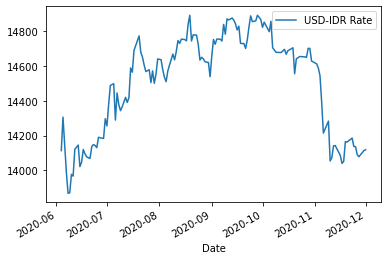

In [62]:
df.plot()

I want to know how much maximum exchange rate differences per day within 5/31/2020 and 11/26/2020 

In [63]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date', 'Day','USD-IDR Rate'))

df['Date']= pd.to_datetime(df['Date'])
df['Day'] = df['Day'].astype('category')
df['USD-IDR Rate'] = df['USD-IDR Rate'].str.replace("IDR","")
df['USD-IDR Rate'] = df['USD-IDR Rate'].str.replace(",","")
df['USD-IDR Rate'] = df['USD-IDR Rate'].astype('float')

df['Day'] = df['Day'].cat.reorder_categories(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Sunday'],
    ordered=True)
df['different'] = df ['USD-IDR Rate']

for i in range(0,144):
    df ['different'][i+1]=df['USD-IDR Rate'][i+1] - df['USD-IDR Rate'][i]

df = df.iloc[1:145]

df.sort_values(by='different', ascending=True)


<ipython-input-63-6b0fda7ad9ad>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df ['different'][i+1]=df['USD-IDR Rate'][i+1] - df['USD-IDR Rate'][i]


,Date,Day,USD-IDR Rate,different
2,2020-06-07,Sunday,13989.39489,-316.56918
129,2020-11-10,Tuesday,14053.76135,-229.53532
27,2020-07-06,Monday,14289.25101,-209.38409
127,2020-11-06,Friday,14214.49744,-174.64283
126,2020-11-05,Thursday,14389.14027,-155.30607
...,...,...,...,...
37,2020-07-17,Friday,14690.05172,125.44362
7,2020-06-12,Friday,14121.55442,154.70300
28,2020-07-07,Tuesday,14445.31657,156.06556
35,2020-07-15,Wednesday,14589.26616,171.37535


Maximum exchange rate differences per day within 5/31/2020 and 11/26/2020 : IDR 316.56918